In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
artist_data = pd.read_table('../testData/artistScrobbleListenerCounts.txt')

In [35]:
artist_data=artist_data[artist_data['total_scrobbles']>0].sort('total_scrobbles',ascending=False)
overall_sum = float(artist_data['total_scrobbles'].sum())
n_artists= float(len(artist_data))

In [30]:
results = []
for i in xrange(1,10001):
    sample = artist_data[artist_data['total_scrobbles']>=i]['total_scrobbles']
    results.append((sample.sum()/overall_sum,len(sample)))

            

    

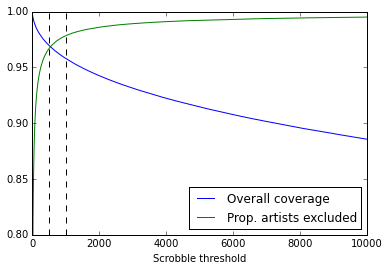

In [48]:
fig,ax = plt.subplots(1,1)
ax.plot([i[0] for i in results],label='Overall coverage')
ax.plot([1-(i[1]/n_artists) for i in results],label='Prop. artists excluded')
ax.set_ylim(0.8,1.0)
ax.legend(loc='lower right')
ax.axvline(1000,ls='--',c='k')
ax.axvline(500,ls='--',c='k')
ax.set_xlabel('Scrobble threshold')

In [59]:
artist_data[(artist_data['total_scrobbles']>=1000)].describe()
artist_data[(artist_data['total_scrobbles']>=1000) & (artist_data['unique_listeners']>=100)].shape

(112312, 3)

In [42]:
2163483/n_artists

0.3213328041858104